# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs) 

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [26]:
city_info = []

url = "http://api.openweathermap.org/data/2.5/weather?"
counter = 0
for city in cities: #[:10]:
   
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    counter=counter+1
    #print(query_url)
    
    try:
        city_num = counter
        city = response["name"]
        country = response["sys"]["country"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        date = response["dt"]
        maxtemp = response["main"]["temp_max"]
        windspeed = response["wind"]["speed"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]

        city_info.append([city_num, city, country, date, humidity, cloudiness, lat, lng, maxtemp, windspeed])
        print(f"Counter  {counter} {city}")
        time.sleep(.2)
    except:
        print("City not found")



Counter  1 São João da Barra
Counter  2 New Norfolk
Counter  3 Dhenkānāl
Counter  4 Ormara
Counter  5 Buta
Counter  6 Barceloneta
City not found
Counter  8 Thompson
Counter  9 Bredasdorp
Counter  10 Nizwá
Counter  11 Nikolskoye
Counter  12 Rikitea
City not found
Counter  14 Punta Arenas
Counter  15 Bluff
Counter  16 Kapaa
Counter  17 Qandala
Counter  18 Fukuechō
Counter  19 Nhulunbuy
Counter  20 Tuktoyaktuk
Counter  21 Khatanga
Counter  22 Mitsamiouli
Counter  23 Ribeira Grande
Counter  24 Ushuaia
Counter  25 Altay
Counter  26 Severo-Kuril'sk
Counter  27 Leningradskiy
Counter  28 Butaritari
Counter  29 Goubellat
Counter  30 Jamestown
Counter  31 Mar del Plata
Counter  32 Zyryanka
Counter  33 Castro
Counter  34 Ouésso
Counter  35 Mataura
City not found
City not found
Counter  38 Avarua
Counter  39 Nizip
City not found
Counter  41 Chokurdakh
Counter  42 Belyy Yar
Counter  43 Jining
Counter  44 Barrow
Counter  45 Lebu
Counter  46 Carnarvon
Counter  47 Rio Grande
Counter  48 Macusani
City 

Counter  381 Sambava
Counter  382 Khor
Counter  383 Velika Plana
Counter  384 Ierissos
Counter  385 Bandarbeyla
Counter  386 Flinders
Counter  387 Merauke
Counter  388 Lavrentiya
Counter  389 Mackay
City not found
Counter  391 Great Bend
Counter  392 Zhuhai
Counter  393 Nalvo
Counter  394 Yigou
Counter  395 Panacan
Counter  396 Chu
Counter  397 Aripuanã
Counter  398 Shingū
Counter  399 La Ronge
Counter  400 Turan
Counter  401 Berlevåg
Counter  402 Ouro Preto do Oeste
Counter  403 Vágur
City not found
Counter  405 Guasdualito
Counter  406 Santa Cruz del Norte
Counter  407 Liaocheng
Counter  408 Dhidhdhoo
Counter  409 Capinzal
Counter  410 Gusau
Counter  411 Palmer
Counter  412 Biak
Counter  413 Chui
Counter  414 Itaperuçu
Counter  415 Taltal
Counter  416 Newport
Counter  417 Selaphum
Counter  418 Olavarría
Counter  419 Himatnagar
Counter  420 Kamphaeng Phet
City not found
City not found
City not found
Counter  424 Anloga
Counter  425 Soyo
Counter  426 Toro
Counter  427 Half Moon Bay
Cou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#write df to file
clean_city_data_df.to_csv('../Resources/city_output.csv')

city_data_df = pd.DataFrame(city_info, columns=["city_num","city", "country", "date", "humidity", "cloudiness","lat", "long", "maxtemp", "windspeed"])
city_data_df

,city_num,city,country,date,humidity,cloudiness,lat,long,maxtemp,windspeed
0,1,São João da Barra,BR,1619458501,62,40,-21.6403,-41.0511,303.15,3.09
1,2,New Norfolk,AU,1619458501,77,15,-42.7826,147.0587,282.04,1.27
2,3,Dhenkānāl,IN,1619458502,89,40,20.6667,85.6000,301.15,4.63
3,4,Ormara,PK,1619458502,81,6,25.2088,64.6357,300.76,5.42
4,5,Buta,CD,1619458502,81,61,2.7858,24.7300,295.51,0.75
...,...,...,...,...,...,...,...,...,...,...
576,617,Ekhabi,RU,1619458765,86,10,53.5102,142.9671,268.31,3.53
577,618,Sabha,LY,1619458765,15,6,27.0377,14.4283,303.50,4.87
578,619,Nanhai,CN,1619458766,88,75,30.1282,111.7784,288.15,0.42
579,620,Okhotsk,RU,1619458766,84,64,59.3833,143.3000,265.65,1.47


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
hum_info = 0
hum_info = city_data_df.loc[city_data_df.humidity > 100]
hum_info

,city_num,city,country,date,humidity,cloudiness,lat,long,maxtemp,windspeed


In [28]:
#  Get the indices of cities that have humidity over 100%.
# none found
if (len(hum_info) != 0):
    print(hum_info.index)
hum_info

,city_num,city,country,date,humidity,cloudiness,lat,long,maxtemp,windspeed


In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if (len(hum_info) != 0):
   # for x in hum_info iterows:
   # for index, row in hum_info.iterrows():
        clean_city_data_df = city_data_df.drop(hum_info.index)
       # city_data_df.loc[index, row]
else:
    clean_city_data_df = city_data_df.copy()
clean_city_data_df

,city_num,city,country,date,humidity,cloudiness,lat,long,maxtemp,windspeed
0,1,São João da Barra,BR,1619458501,62,40,-21.6403,-41.0511,303.15,3.09
1,2,New Norfolk,AU,1619458501,77,15,-42.7826,147.0587,282.04,1.27
2,3,Dhenkānāl,IN,1619458502,89,40,20.6667,85.6000,301.15,4.63
3,4,Ormara,PK,1619458502,81,6,25.2088,64.6357,300.76,5.42
4,5,Buta,CD,1619458502,81,61,2.7858,24.7300,295.51,0.75
...,...,...,...,...,...,...,...,...,...,...
576,617,Ekhabi,RU,1619458765,86,10,53.5102,142.9671,268.31,3.53
577,618,Sabha,LY,1619458765,15,6,27.0377,14.4283,303.50,4.87
578,619,Nanhai,CN,1619458766,88,75,30.1282,111.7784,288.15,0.42
579,620,Okhotsk,RU,1619458766,84,64,59.3833,143.3000,265.65,1.47


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

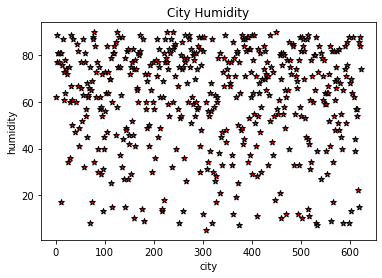

In [11]:
# Generate a scatter plot of city data
x_values = clean_city_data_df['city_num']
y_values = clean_city_data_df['humidity']

plt.scatter( x_values, y_values, marker="*", facecolors="red", edgecolors="black")
plt.xlabel('city') 
plt.ylabel('humidity')
plt.title( "City Humidity")
plt.savefig("../images/city_humidity.png")
plt.show()


### The plot above shows the humidity in a the cities within the latitudes of 0 to less than 100.

## Latitude vs. Temperature Plot

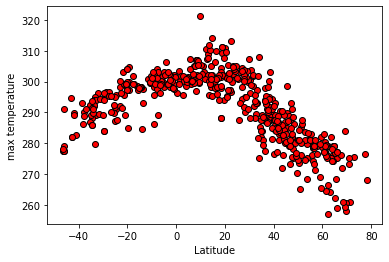

In [12]:

# Generate a scatter plot of city data
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['maxtemp']

plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('max temperature')
plt.savefig("../images/temp_lat.png")
plt.show()


### The plot above shows the temperatures in a the cities with max temperature spikes between 290 and 310.

## Latitude vs. Humidity Plot

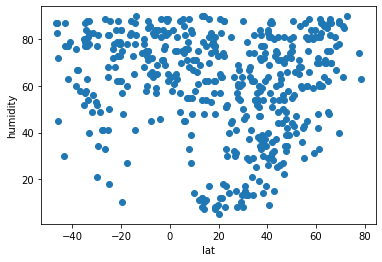

In [13]:

# Generate a scatter plot of city data
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['humidity']

plt.scatter(x_values, y_values)
plt.xlabel('lat')
plt.ylabel('humidity')
plt.savefig("../images/humidity_lat.png")
plt.show()


### The plot above shows the humidity in a the cities within the latitudes of 40 and 80.

## Latitude vs. Cloudiness Plot

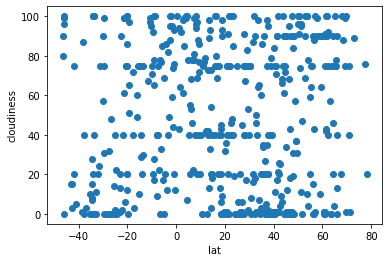

In [14]:

# Generate a scatter plot of city data
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['cloudiness']

plt.scatter(x_values, y_values)
plt.xlabel('lat')
plt.ylabel('cloudiness')
plt.savefig("../images/cloud_lat.png")

plt.show()


### The plot above shows the cloudiness in a the cities mostly scattered within the latitudes of 0 to less than 100.

## Latitude vs. Wind Speed Plot

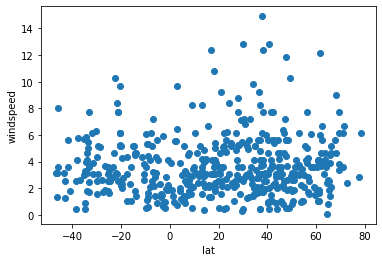

In [15]:

# Generate a scatter plot of city data
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['windspeed']

plt.scatter(x_values, y_values)
plt.xlabel('lat')
plt.ylabel('windspeed')
plt.savefig("../images/windspeed_lat.png")
plt.show()


### The plot above shows the wind speed in cities mostly within the latitudes of -40 to 60.

## Linear Regression

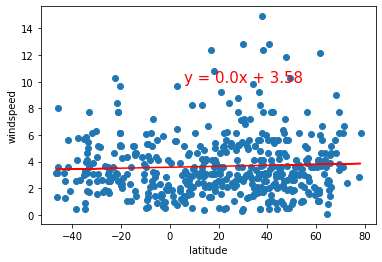

In [16]:
# plt.figure(figsize=(20,3))
# Generate a scatter plot of city data

x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('windspeed')
plt.savefig("../images/windspeed_lat_linear.png")
plt.show()


### The plot above shows the average wind speed in a the cities within the latitudes of -40 to less than 70.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

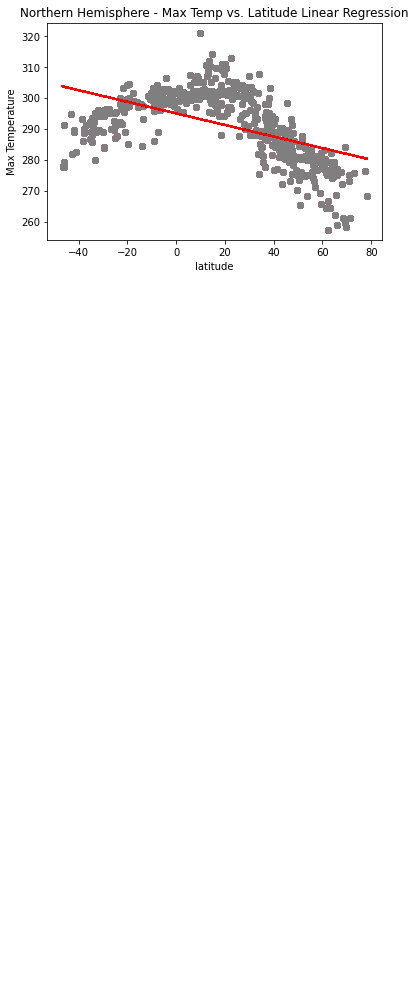

In [17]:
x_values = clean_city_data_df['lat']
for x in x_values:
    if x >= 0:
        y_values = clean_city_data_df['maxtemp']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')
       

plt.ylabel('Max Temperature')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../images/maxtemp_lat_linear_N.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

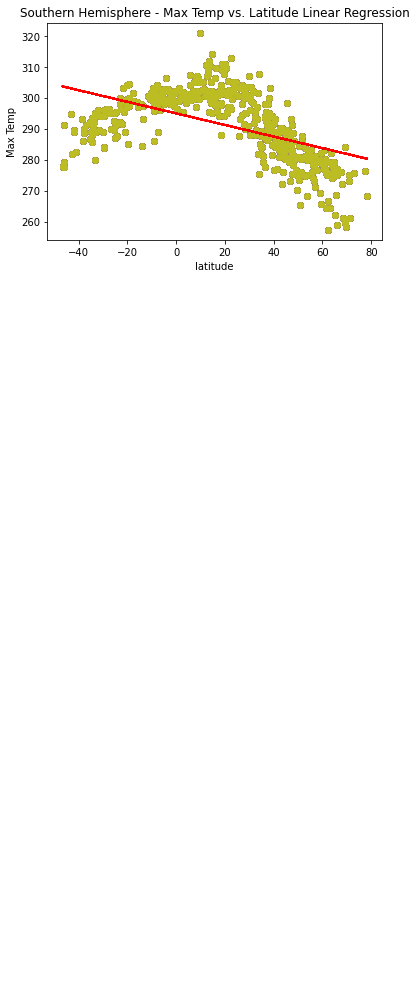

In [18]:
x_values = clean_city_data_df['lat']
y_values = clean_city_data_df['maxtemp']

# south_x = []
# south_y = []

#print(df[df[‘Name’]==’Donna’].index.values)
#index = 0
for x in x_values:
    if x < 0:
        #south_x.append(x)
        #find the location of x and print y value at that location
        #y = clean_city_data[clean_city_data['lat']==x].index.values 
        #south_y.append(y_values_1[y])

        # x_values = south_x
        # y_values = south_y

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        
plt.xlabel('latitude')

plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../images/maxtemp_lat_linear_S.png")
plt.show()

### The plot above shows the max temperatures are around  latitudes of 0 to less than 40 also showing a negative slope as latitude increases. Shows the same for both hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

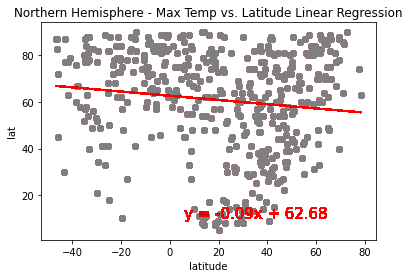

In [19]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x >= 0:
        y_values = clean_city_data_df['humidity']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../images/humidity_lat_linear_N.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

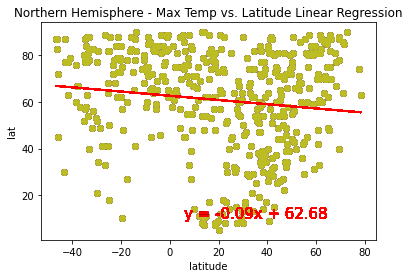

In [20]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x < 0:
        y_values = clean_city_data_df['humidity']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Northern Hemisphere - Humidity  vs. Latitude Linear Regression")
plt.savefig("../images/humidity_lat_linear_N.png")
plt.show()

### The plot above shows the humidity are around  latitudes of -40 to less than 60 also showing a negative slope as latitude increases. Shows the same for both hemisphere. A slight drop in slope as latitude increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

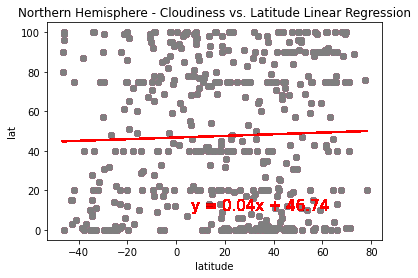

In [21]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x >= 0:
        y_values = clean_city_data_df['cloudiness']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig("../images/maxtemp_lat_linear_N.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

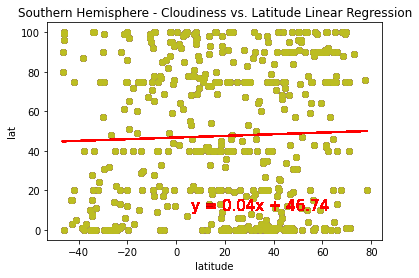

In [22]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x < 0:
        y_values = clean_city_data_df['cloudiness']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('lat')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig("../images/cloudiness_lat_linear_S.png")
plt.show()


### The plot above shows the average cloudiness around  latitudes of -40 to less than 80 also showing a slight positive slope as latitude increases. Shows the same for both hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

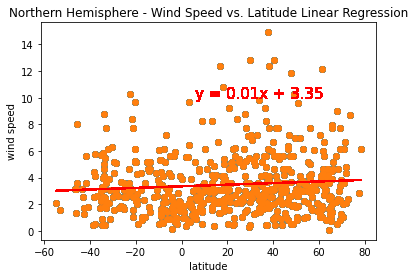

In [33]:
x_values = clean_city_data_df['lat']
x_values

for x in x_values:
    if x >= 0:
        y_values = clean_city_data_df['windspeed']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('wind speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig("../images/windspeed_lat_linear_N.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

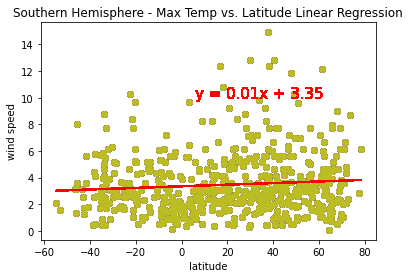

In [32]:
x_values = clean_city_data_df['lat']


for x in x_values:
    if x < 0:
        y_values = clean_city_data_df['windspeed']

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values, y_values)
        plt.plot(x_values,regress_values,"r-")
        plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        plt.xlabel('latitude')

plt.ylabel('wind speed')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../images/windspeed_lat_linear_S.png")
plt.show()


In [25]:
My Observation is that the avg wind speed value lies in the area between 40 latititue and 60 latitude. The slope is almost flat. Both hemisphere look alike.